# Ecuaciones de orden superior y Sistema de ecuaciones diferenciales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl 
from scipy.interpolate import interp1d 

Resolveremos una ecuación de la forma:

\begin{equation}
\frac{dx}{dt} = 5x-3y
\end{equation}

\begin{equation}
\frac{dy}{dt} = -6x+2y
\end{equation}

con condición inicial:
\begin{equation}
x(0) = 0 \quad y(0) = 1 \quad y \quad 0<t<\frac{1}{4}
\end{equation}

Y definimos las funciones:

In [2]:
def f(t,x,y):
    return 5*x-3*y

In [3]:
def g(t,x,y):
    return -6*x+2*y

#### Aplicamos el método de Runge-Kutta

In [4]:
N=1000
a = 0.
b = 1/4
h = (b-a)/N
t = np.linspace(a,b,N)
x_rk = [0]
y_rk = [1]
for i in range(1,N):
    k_11 = h*f(t[i-1],x_rk[i-1],y_rk[i-1])
    k_12 = h*g(t[i-1],x_rk[i-1],y_rk[i-1])
    
    k_21 = h*f(t[i-1]+h/2.,x_rk[i-1]+k_11/2.,y_rk[i-1]+k_12/2.)
    k_22 = h*g(t[i-1]+h/2.,x_rk[i-1]+k_11/2.,y_rk[i-1]+k_12/2.)
    
    k_31 = h*f(t[i-1]+h/2.,x_rk[i-1]+k_21/2.,y_rk[i-1]+k_22/2.)
    k_32 = h*g(t[i-1]+h/2.,x_rk[i-1]+k_21/2.,y_rk[i-1]+k_22/2.)
    
    k_41 = h*f(t[i-1]+h,x_rk[i-1]+k_31,y_rk[i-1]+k_32)
    k_42 = h*g(t[i-1]+h,x_rk[i-1]+k_31,y_rk[i-1]+k_32)
    
    x_rk.append(x_rk[i-1]+(k_11+2.*k_21+2.*k_31+k_41)/6.)
    y_rk.append(y_rk[i-1]+(k_12+2.*k_22+2.*k_32+k_42)/6.)

comparamos con las soluciones exactas

\begin{equation}
x_(t) = \frac{1}{3}e^{-t} - \frac{1}{3}e^{8t}
\end{equation}

\begin{equation}
y_(t) = \frac{2}{3}e^{-t} + \frac{1}{3}e^{8t}
\end{equation}

In [5]:
x_e = (1/3.)*np.exp(-t) -(1/3.)*np.exp(8*t)
y_e = (2/3.)*np.exp(-t) +(1/3.)*np.exp(8*t)

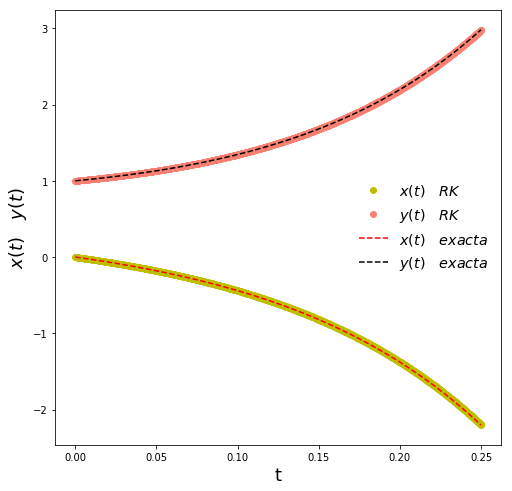

In [6]:
plt.figure(figsize=(8,8))
plt.plot(t,x_rk,'yo',label='$x(t)\quad RK$')
plt.plot(t,y_rk,'o', color='salmon',label='$y(t)\quad RK$')
plt.plot(t,x_e,'r--',label='$x(t)\quad exacta$')
plt.plot(t,y_e,'k--',label='$y(t)\quad exacta$')
plt.xlabel('t', fontsize=18)
plt.ylabel('$x(t) \quad y(t)$', fontsize=18)
plt.legend(loc='center right', shadow=True, frameon = False , fontsize='x-large')